In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
datos = pd.read_csv('/content/drive/MyDrive/Lenguajes multiplaforma - Esp IA/unidad 2/red neural /datos/temperaturas.csv')

In [3]:
celsius = np.array(datos['Celsius'])
fahrenheit = np.array(datos['Fahrenheit'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(celsius, fahrenheit, test_size=0.2, random_state=42)

In [5]:
modelo = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])
capa = modelo.layers[0]

In [6]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [7]:
print("Comenzando el entrenamiento del modelo...")
historial = modelo.fit(X_train, y_train, epochs=1000, verbose=False)
print("¡Modelo entrenado!")

Comenzando el entrenamiento del modelo...
¡Modelo entrenado!


In [8]:
y_pred = modelo.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [9]:
print("\n--- Métricas de Desempeño del Modelo ---")


--- Métricas de Desempeño del Modelo ---


In [10]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae:.2f}")

Error Absoluto Medio (MAE): 0.00


In [11]:
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

Error Cuadrático Medio (MSE): 0.00


In [12]:
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Coeficiente de Determinación (R²): 1.0000


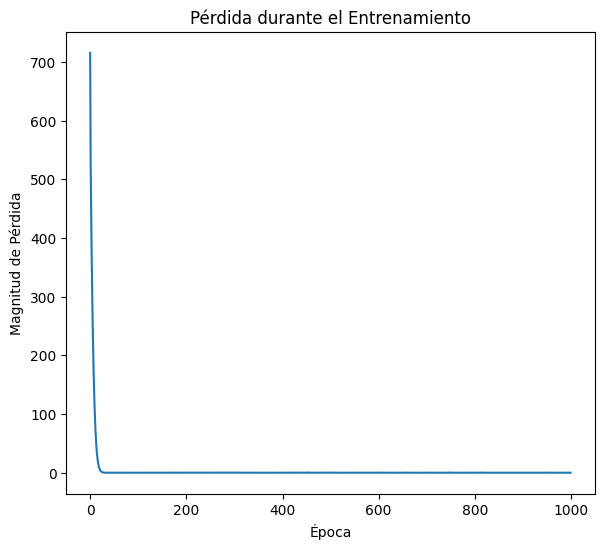

In [13]:
plt.figure(figsize=(15, 6)) # Hacemos la figura más ancha para que quepan bien los gráficos
plt.subplot(1, 2, 1)
plt.xlabel("Época")
plt.ylabel("Magnitud de Pérdida")
plt.title("Pérdida durante el Entrenamiento")
plt.plot(historial.history["loss"])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


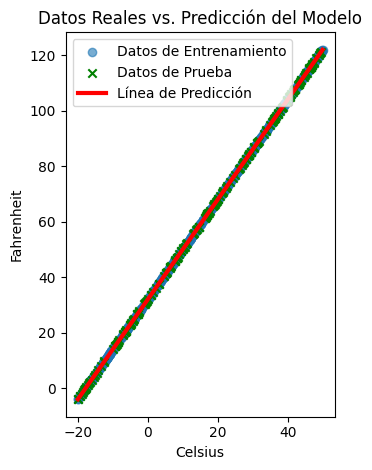

In [14]:
plt.subplot(1, 2, 2)
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.title("Datos Reales vs. Predicción del Modelo")
plt.scatter(X_train, y_train, label="Datos de Entrenamiento", alpha=0.6)
plt.scatter(X_test, y_test, label="Datos de Prueba", color='green', marker='x')
celsius_rango = np.linspace(celsius.min(), celsius.max(), 100)
fahrenheit_pred_rango = modelo.predict(celsius_rango)
plt.plot(celsius_rango, fahrenheit_pred_rango, color='red', linewidth=3, label="Línea de Predicción")
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
print("\nVamos a hacer una predicción...")
valor_celsius = 100.0
resultado = modelo.predict(np.array([valor_celsius]))
print(f"La predicción para {valor_celsius}°C es {resultado[0][0]:.2f}°F")


Vamos a hacer una predicción...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
La predicción para 100.0°C es 212.00°F


In [16]:
print("\nVariables internas del modelo (lo que aprendió la red):")
pesos = capa.get_weights()
print(f"Peso (debe ser cercano a 1.8): {pesos[0][0][0]:.4f}")
print(f"Sesgo (debe ser cercano a 32): {pesos[1][0]:.4f}")


Variables internas del modelo (lo que aprendió la red):
Peso (debe ser cercano a 1.8): 1.8000
Sesgo (debe ser cercano a 32): 31.9997
